# Soru 1

In [1]:
#İlk başta gerekli kütüphaneler eklenir
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from plot_keras_history import plot_history 
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping 

In [2]:
#Ortalama hata tahmini
from sklearn.metrics import mean_squared_error

In [3]:
#Veriyi tanıtma
excel_seti = pd.read_excel('heart_failure_clinical_records.xlsx')

In [4]:
#İlk beş satırı gösterir
excel_seti.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [5]:
#Satır ve sütun sayısı
excel_seti.shape

(5000, 13)

In [6]:
#Satırlardaki yazılanların tipi
excel_seti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [7]:
#Boş satır var mı
excel_seti.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
#Veri setindeki 'DEATH_EVENT' bağımlı değişkenini bağımsız değişkenlerden ayrıştırma
x = excel_seti.drop(['DEATH_EVENT'], axis = 1)
y = excel_seti['DEATH_EVENT'].values

In [9]:
#Eldeki veriyi belirli bir standarta sokmak
from sklearn.preprocessing import MinMaxScaler
skaler_x = MinMaxScaler()
skaler_y = MinMaxScaler()
x = skaler_x.fit_transform(x)
y = skaler_y.fit_transform(y.reshape(-1,1))

In [10]:
x_train ,  x_test , y_train , y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [11]:
#Yapay sinir ağı modülü ekleme
act_func = 'relu'

In [12]:
veri = Sequential()
veri.add(Dense (26, input_dim=12, activation = act_func))
veri.add(Dense(52, activation = act_func))
veri.add(Dense (26, activation = act_func))
veri.add(Dense (1, activation = act_func))

# Eldeki veriyi derlemek
veri.compile(loss='mean_squared_error', optimizer = 'rmsprop')

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience = 100, restore_best_weights= True)
#model eğitme
history = veri.fit(x_train, y_train, epochs = 5000, batch_size= 1024, verbose = 1, validation_split=0.25, callbacks = [early_stop])

Epoch 1/5000


/Users/yusufsoyturk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3094 - val_loss: 0.3109
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3094 - val_loss: 0.3109
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3161 - val_loss: 0.3109
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3088 - val_loss: 0.3109
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3119 - val_loss: 0.3109
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3102 - val_loss: 0.3109
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3106 - val_loss: 0.3109
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3166 - val_loss: 0.3109
Epoch 9/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3082 - val_loss: 0.3109
Epoch 10/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3070 - val_loss: 0.3109
Epoch 11/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3082 - val_loss: 0.3109
Epoch 12/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3148 - val_loss: 0.3109
E

Epoch 70/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3077 - val_loss: 0.3109
Epoch 71/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3116 - val_loss: 0.3109
Epoch 72/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3087 - val_loss: 0.3109
Epoch 73/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3098 - val_loss: 0.3109
Epoch 74/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3109 - val_loss: 0.3109
Epoch 75/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3080 - val_loss: 0.3109
Epoch 76/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3132 - val_loss: 0.3109
Epoch 77/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3045 - val_loss: 0.3109
Epoch 78/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3086 - val_loss: 0.3109
Epoch 79/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3074 - val_loss: 0.3109
Epoch 80/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3130 - val_loss: 0.3109
Epoch 81/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3087

In [13]:
y_Tahmin = veri.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step


In [14]:
meanSquared = mean_squared_error(y_test, y_Tahmin)
print('MSE : ', meanSquared)

MSE :  0.31933333333333336


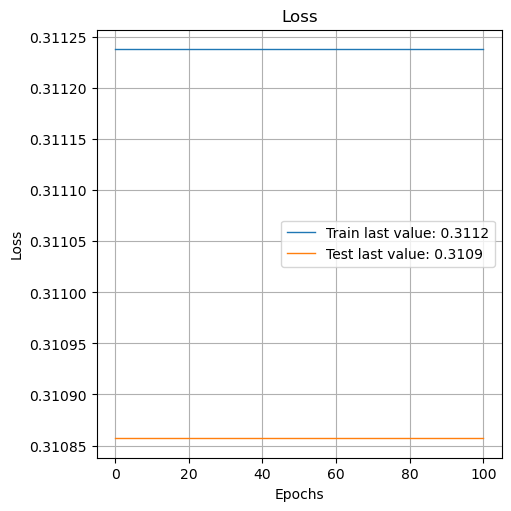

In [15]:
plot_history(history.history)
plt.show()

# Soru 2

In [16]:
#Verileri indirip işleyecebilecek kütüphaneleri eklemek
from bs4 import BeautifulSoup 
import requests
import pandas as pd

In [40]:
erisim = requests.get("https://tr.mashable.com/tech/").text

In [41]:
#HTML diline uygun işlem
beautiful = BeautifulSoup(erisim,'html.parser')

In [46]:
veri_listesi = []
for satir in beautiful.find_all('div', {'class':'grid-item'}):
    news_title = satir.find('div',{'class':'box'}).find('a', {'class':'box_title'}).text
    veri_listesi.append({
        'Haber Başlığı': news_title
    })
    

In [47]:
veri_listesi

[{'Haber Başlığı': "\n                        Opsiyonel Ne Demek ve Anlamı Nedir? TikTok'da Opsiyonel Kelimesi Ne İçin Kullanılır?\n                    "},
 {'Haber Başlığı': "\n                        Google'ın YZ özetleri, pizzanıza YAPIŞTIRICI koymanızı öneriyor! (Yeni arama deneyimine hoş geldiniz)\n                    "},
 {'Haber Başlığı': "\n                        iOS 18 ile iPhone'lara yeni emojiler gelecek (Bitkinliğimizi yeni bir şekilde anlatabileceğiz!)\n                    "},
 {'Haber Başlığı': "\n                        Honor'un yeni akıllı telefonlarına Gemini dopingi!\n                    "},
 {'Haber Başlığı': '\n                        Apple Music, iOS 18 ile "şenlenecek"\n                    '},
 {'Haber Başlığı': '\n                            Apple iPad Air 2024 (13 inç) incelemesi: Artık daha büyük ekranlısı da var\n                        '},
 {'Haber Başlığı': '\n                            Apple iPad Pro 2024 (13 inç) incelemesi: Dünyaya meydan okuyan tablet\

In [48]:
df = pd.DataFrame(veri_listesi)

In [49]:
df

,Haber Başlığı
0,\n Opsiyonel Ne Demek v...
1,\n Google'ın YZ özetler...
2,\n iOS 18 ile iPhone'la...
3,\n Honor'un yeni akıllı...
4,"\n Apple Music, iOS 18 ..."
5,\n Apple iPad Air 2...
6,\n Apple iPad Pro 2...
7,\n Xiaomi 14 Ultra ...
8,\n Lenovo Slim 7 14...
9,\n 15 inç M3 MacBoo...
